In [1]:
import numpy as np
from ldpc import *
import matplotlib.pyplot as plt
from scipy.misc import imsave
import sys
from sklearn.grid_search import ParameterGrid
import time
import pandas as pd

%matplotlib inline

In [2]:
n, m = 400, 300
H = generate_h(m, n)
q = 0.1

params = {
    'schedule': ['parallel', 'sequential'],
    'damping': np.linspace(0.2, 1, 5)
}

num_it = 100
max_iter = 100

grid = ParameterGrid(params)
ans_b = np.zeros((len(grid), max_iter))
ans_t = np.zeros(len(grid))
ans_s = np.zeros((len(grid), num_it))

ss = [None] * num_it
ee = [None] * num_it

for i in range(num_it):
    u = np.random.choice(2, n - m)
    e = np.random.choice(2, n, p=[1 - q, q])
    s = np.dot(H, e) % 2
    ss[i] = s
    ee[i] = e

for j, pm in enumerate(grid):
    print(pm)
    tm = np.zeros(num_it)
    for i in range(num_it):
        print("Try #", i)
        sys.stdout.flush()
        s = ss[i]
        e = ee[i]
        tm[i] = time.time()
        e_est, status, tmp = decode(s, H, q, return_e=True, max_iter=max_iter, **grid[j])
        ans_b[j] += tmp / n
        ans_s[j][i] = status
        tm[i] = time.time() - tm[i]
        if not np.allclose(e_est, e):
            print("Error!!")
    ans_b[j] /= num_it
    ans_t[j] = np.mean(tm)

{'schedule': 'parallel', 'damping': 0.20000000000000001}
Try # 0
Try # 1
Try # 2
Try # 3
Try # 4
Try # 5
Try # 6
Try # 7
Try # 8
Try # 9
Error!!
Try # 10
Try # 11
Try # 12
Try # 13
Try # 14
Try # 15
Try # 16
Try # 17
Try # 18
Try # 19
Try # 20
Try # 21
Try # 22
Try # 23
Error!!
Try # 24
Try # 25
Try # 26
Try # 27
Try # 28
Try # 29
Try # 30
Try # 31
Try # 32
Try # 33
Try # 34
Try # 35
Try # 36
Try # 37
Try # 38
Try # 39
Try # 40
Try # 41
Try # 42
Try # 43
Try # 44
Error!!
Try # 45
Try # 46
Try # 47
Try # 48
Try # 49
Try # 50
Try # 51
Try # 52
Try # 53
Try # 54
Try # 55
Try # 56
Try # 57
Try # 58
Error!!
Try # 59
Try # 60
Try # 61
Try # 62
Try # 63
Error!!
Try # 64
Try # 65
Try # 66
Try # 67
Try # 68
Error!!
Try # 69
Try # 70
Try # 71
Try # 72
Try # 73
Try # 74
Try # 75
Try # 76
Try # 77
Error!!
Try # 78
Try # 79
Try # 80
Try # 81
Try # 82
Try # 83
Try # 84
Error!!
Try # 85
Try # 86
Try # 87
Try # 88
Try # 89
Try # 90
Try # 91
Try # 92
Error!!
Try # 93
Try # 94
Try # 95
Error!!
Try # 96


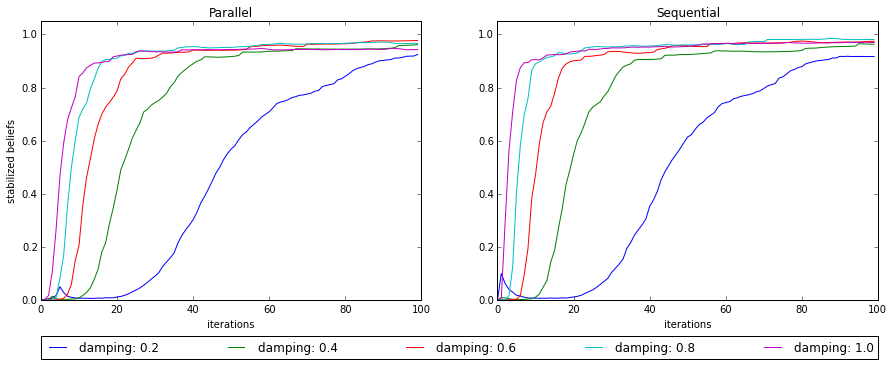

In [6]:
labels = list(map(lambda x: 'damping: {:.3}'.format(x['damping']), list(grid)[::2]))
plt.subplots(figsize=(15, 5))
ax1 = plt.subplot(1, 2, 1)
plt.title('Parallel')
plt.ylabel('stabilized beliefs')
for i in range(10):
    if i % 2 == 0:
        plt.plot(ans_b[i], label=labels[i // 2])
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
ax2.set_ylim([0, 1.05])
plt.title('Sequential')
ax1.set_xlabel('iterations')
ax2.set_xlabel('iterations')
for i in range(10):
    if i % 2 == 1:
        plt.plot(ans_b[i], label=labels[i // 2])
plt.legend(bbox_to_anchor=(-1.2, -0.21, 2.2, .102), loc=3,
           ncol=5, mode="expand", borderaxespad=0.)

In [4]:
print(pd.DataFrame({'parallel': ans_t[::2], 'sequential': ans_t[1::2]}).to_latex())

\begin{tabular}{lrr}
\toprule
{} &   parallel &  sequential \\
\midrule
0 &  28.627381 &   35.050969 \\
1 &  13.962757 &   17.013801 \\
2 &  10.167084 &   11.645704 \\
3 &   7.867124 &    7.843200 \\
4 &   7.035874 &    6.320822 \\
\bottomrule
\end{tabular}



In [10]:
n = 200
q_range = np.array([0.05, 0.1, 0.15])
r_range = np.hstack((np.array([0.01]), np.linspace(0.1, 0.9, 9), np.array([0.99])))
err_bit = np.zeros((q_range.shape[0], r_range.shape[0]))
err_block = np.zeros((q_range.shape[0], r_range.shape[0]))
diver = np.zeros((q_range.shape[0], r_range.shape[0]))

for i, q in enumerate(q_range):
    print(q)
    for j, r in enumerate(r_range):
        m = int(round(n * (1 - r)))
        print(n, m, r)
        sys.stdout.flush()
        H = generate_h(m, n)
        err_bit[i, j], err_block[i, j], diver[i, j] = estimate_errors(H, q, 100)

0.05
200 198 0.01
200 180 0.1
200 160 0.2
200 140 0.3
200 120 0.4
200 100 0.5
200 80 0.6
200 60 0.7
200 40 0.8
200 20 0.9
200 2 0.99
0.1
200 198 0.01
200 180 0.1
200 160 0.2
200 140 0.3
200 120 0.4
200 100 0.5
200 80 0.6
200 60 0.7
200 40 0.8
200 20 0.9
200 2 0.99
0.15
200 198 0.01
200 180 0.1
200 160 0.2
200 140 0.3
200 120 0.4
200 100 0.5
200 80 0.6
200 60 0.7
200 40 0.8
200 20 0.9
200 2 0.99


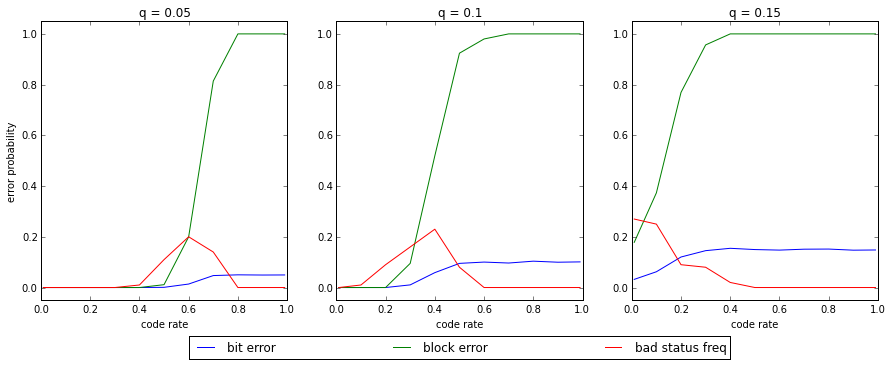

In [11]:
plt.subplots(figsize=(15, 5))
ax1 = plt.subplot(1, 3, 1)
plt.title('q = 0.05')
plt.plot(r_range, err_bit[0], label='bit error')
plt.plot(r_range, err_block[0], label='block error')
plt.plot(r_range, diver[0], label='bad status freq')
plt.ylim([-0.05, 1.05])
plt.xlabel("code rate")
plt.ylabel("error probability")

ax2 = plt.subplot(1, 3, 2, sharey=ax1)
plt.title('q = 0.1')
plt.plot(r_range, err_bit[1], label='bit error')
plt.plot(r_range, err_block[1], label='block error')
plt.plot(r_range, diver[1], label='bad status freq')
plt.ylim([-0.05, 1.05])
plt.xlabel("code rate")

ax3 = plt.subplot(1, 3, 3, sharey=ax2)
plt.title('q = 0.15')
plt.plot(r_range, err_bit[2], label='bit error')
plt.plot(r_range, err_block[2], label='block error')
plt.plot(r_range, diver[2], label='bad status freq')
plt.ylim([-0.05, 1.05])
plt.xlabel("code rate")

plt.legend(bbox_to_anchor=(-1.8, -0.21, 2.2, .102), loc=3,
           ncol=5, mode="expand", borderaxespad=0.)

In [9]:
r = 0.2
q_range = np.array([0.05, 0.1, 0.12])
n_range = np.array([10, 25, 50, 100, 200, 500])
err_bit = np.zeros((q_range.shape[0], n_range.shape[0]))
err_block = np.zeros((q_range.shape[0], n_range.shape[0]))
diver = np.zeros((q_range.shape[0], n_range.shape[0]))

for i, q in enumerate(q_range):
    print(q)    
    for j, n in enumerate(n_range):
        m = int(round(n * (1 - r)))
        print(n, m, r)
        sys.stdout.flush()        
        H = generate_h(m, n)
        err_bit[i, j], err_block[i, j], diver[i, j] = estimate_errors(H, q, 50)

0.05
10 8 0.2
25 20 0.2
50 40 0.2
100 80 0.2
200 160 0.2


KeyboardInterrupt: 

In [ ]:
plt.subplots(figsize=(15, 5))
ax1 = plt.subplot(1, 3, 1)
plt.title('q = 0.05')
plt.plot(n_range, err_bit[0], label='bit error')
plt.plot(n_range, err_block[0], label='block error')
plt.plot(n_range, diver[0], label='bad status freq')
plt.ylim([-0.05, 1.05])
plt.xlabel("code size")
plt.ylabel("error probability")

ax2 = plt.subplot(1, 3, 2, sharey=ax1)
plt.title('q = 0.1')
plt.plot(n_range, err_bit[1], label='bit error')
plt.plot(n_range, err_block[1], label='block error')
plt.plot(n_range, diver[1], label='bad status freq')
plt.ylim([-0.05, 1.05])
plt.xlabel("code size")

ax3 = plt.subplot(1, 3, 3, sharey=ax2)
plt.title('q = 0.12')
plt.plot(n_range, err_bit[2], label='bit error')
plt.plot(n_range, err_block[2], label='block error')
plt.plot(n_range, diver[2], label='bad status freq')
plt.ylim([-0.05, 1.05])
plt.xlabel("code size")

plt.legend(bbox_to_anchor=(-1.8, -0.21, 2.2, .102), loc=3,
           ncol=5, mode="expand", borderaxespad=0.)

In [ ]:
n, m = 400, 300
q_range = np.array([0.05, 0.1, 0.12])
o_range = np.array([3, 5, 10, 20, 50, 100])
err_bit = np.zeros((q_range.shape[0], o_range.shape[0]))
err_block = np.zeros((q_range.shape[0], o_range.shape[0]))
diver = np.zeros((q_range.shape[0], o_range.shape[0]))

for i, q in enumerate(q_range):
    print(q)
    sys.stdout.flush()
    for j, o in enumerate(o_range):
        print(o)
        sys.stdout.flush()        
        H = generate_h(m, n, num_ones=o)
        err_bit[i, j], err_block[i, j], diver[i, j] = estimate_errors(H, q, 100)

In [ ]:
plt.subplots(figsize=(15, 5))
ax1 = plt.subplot(1, 3, 1)
plt.title('q = 0.05')
plt.plot(o_range, err_bit[0], label='bit error')
plt.plot(o_range, err_block[0], label='block error')
plt.plot(o_range, diver[0], label='bad status freq')
plt.ylim([-0.05, 1.05])
plt.xlabel("H density")
plt.ylabel("error probability")

ax2 = plt.subplot(1, 3, 2, sharey=ax1)
plt.title('q = 0.1')
plt.plot(o_range, err_bit[1], label='bit error')
plt.plot(o_range, err_block[1], label='block error')
plt.plot(o_range, diver[1], label='bad status freq')
plt.ylim([-0.05, 1.05])
plt.xlabel("H density")

ax3 = plt.subplot(1, 3, 3, sharey=ax2)
plt.title('q = 0.12')
plt.plot(o_range, err_bit[2], label='bit error')
plt.plot(o_range, err_block[2], label='block error')
plt.plot(o_range, diver[2], label='bad status freq')
plt.ylim([-0.05, 1.05])
plt.xlabel("H density")

plt.legend(bbox_to_anchor=(-1.8, -0.21, 2.2, .102), loc=3,
           ncol=5, mode="expand", borderaxespad=0.)

In [12]:
n, m = 10, 6
H = generate_h(m, n)
G, ind = make_generator_matrix(H)
q = 0.1
u = np.random.choice(2, 4)
e = np.random.choice(2, n, p=[1-q, q])
v = np.dot(G, u) % 2
w = (v + e) % 2
s = np.dot(H, w) % 2

In [13]:
import os, struct
from array import array as pyarray
from numpy import append, array, int8, uint8, zeros

def load_mnist(dataset="training", digits=np.arange(10), path="."):
    """
    Loads MNIST files into 3D numpy arrays

    Adapted from: http://abel.ee.ucla.edu/cvxopt/_downloads/mnist.py
    """

    if dataset == "training":
        fname_img = os.path.join(path, 'train-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels-idx1-ubyte')
    elif dataset == "testing":
        fname_img = os.path.join(path, 't10k-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels-idx1-ubyte')
    else:
        raise ValueError("dataset must be 'testing' or 'training'")

    flbl = open(fname_lbl, 'rb')
    magic_nr, size = struct.unpack(">II", flbl.read(8))
    lbl = pyarray("b", flbl.read())
    flbl.close()

    fimg = open(fname_img, 'rb')
    magic_nr, size, rows, cols = struct.unpack(">IIII", fimg.read(16))
    img = pyarray("B", fimg.read())
    fimg.close()

    ind = [ k for k in range(size) if lbl[k] in digits ]
    N = len(ind)

    images = zeros((N, rows, cols), dtype=uint8)
    labels = zeros((N, 1), dtype=int8)
    for i in range(len(ind)):
        images[i] = array(img[ ind[i]*rows*cols : (ind[i]+1)*rows*cols ]).reshape((rows, cols))
        labels[i] = lbl[ind[i]]

    return images, labels

In [14]:
data, _ = load_mnist()

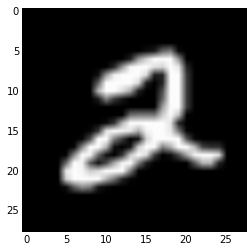

In [15]:
plt.imshow(data[5], cmap='gray')

In [16]:
img = data[5].reshape(-1)

In [17]:
n, m = 100, 60
H = generate_h(m, n)
G, ind = make_generator_matrix(H)
u = np.random.choice(2, 40)
e = np.random.choice(2, n, p=[1-q, q])
v = np.dot(G, u) % 2
w = (v + e) % 2
s = np.dot(H, w) % 2

In [18]:
np.allclose(v[ind], u)

True

In [19]:
n, m = 784 * 4, 784 * 3
H = generate_h(m, n)
G, ind = make_generator_matrix(H)
u = (img > 0).astype(np.int)
q = 0.1
e = np.random.choice(2, n, p=[1-q, q])
v = np.dot(G, u) % 2
w = (v + e) % 2
s = np.dot(H, w) % 2

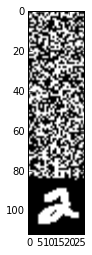

In [130]:
plt.imshow(v.reshape(-1, 28), cmap='gray')
imsave('report/images/gt.png', v.reshape(-1, 28))

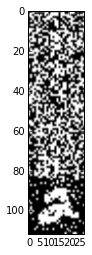

In [132]:
plt.imshow(w.reshape(-1, 28), cmap='gray')
imsave('report/images/err.png', w.reshape(-1, 28))

In [20]:
e_est, status = decode(s, H, q, display=True)

Iteration #0: beliefs stabilized 0/3136
Iteration #1: beliefs stabilized 5/3136
Iteration #2: beliefs stabilized 50/3136
Iteration #3: beliefs stabilized 318/3136
Iteration #4: beliefs stabilized 1000/3136
Iteration #5: beliefs stabilized 1842/3136
Iteration #6: beliefs stabilized 2673/3136


In [113]:
np.allclose(e, e_est), status

(True, 0)

In [134]:
for i in range(9):
    imsave('report/images/{}.png'.format(i), ((w + es[i]) % 2).reshape(-1, 28))

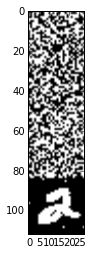

In [102]:
plt.imshow(((w + es[1]) % 2).reshape(-1, 28), cmap='gray')

In [135]:
imsave('report/images/out.png', ((w + e_est) % 2).reshape(-1, 28))

In [12]:
status, np.allclose(e_est, e)

(0, True)

In [16]:
e_est, status = decode(s, H, q, display=True, schedule='parallel')

Iteration #0: beliefs stabilized 0/100
Iteration #1: beliefs stabilized 1/100
Iteration #2: beliefs stabilized 0/100
Iteration #3: beliefs stabilized 0/100
Iteration #4: beliefs stabilized 0/100
Iteration #5: beliefs stabilized 0/100
Iteration #6: beliefs stabilized 1/100
Iteration #7: beliefs stabilized 0/100


In [17]:
status, np.allclose(e_est, e)

(0, True)

In [22]:
mu_eh = np.empty((n, m, 2))
mu_he = np.empty((m, n, 2))
mu_eh[:, :, 0] = 1 - q
mu_eh[:, :, 1] = q

dp = mu_eh[:, :, 0] - mu_eh[:, :, 1]
j = 0
i = 1
ind = np.setdiff1d(np.where(H[j] == 1)[0], np.array(i))
dpl = np.prod(dp[ind, j])
mu_he[j, i, s[i]] = (1.0 + dpl) / 2.0
mu_he[j, i, s[i] ^ 1] = (1.0 - dpl) / 2.0

In [10]:
for j, i in zip(*np.where(H == 1)):
    print(i, j)

0 0
1 0
4 0
3 1
2 2
4 2


In [24]:
mu_he[0,0]

array([  6.93492023e-310,   2.20306164e-316])

In [25]:
mu_he[0,1]

array([ 0.68,  0.32])

In [32]:
0.8**2+0.2**2

0.6800000000000002

In [34]:
0.2*0.8 * 2

0.32000000000000006

In [19]:
dpl

0.3600000000000001

In [20]:
s[j]

1

In [27]:
s[j] ^ 1

0